<h3> In this notebook we will perform preprocessing of the total wine database including</h3>
<ol>
    <li> Creating dummy variables from categorical variables where needed </li>
    <li> Scaling continuous variables</li>
    <li> Split into a training and test test </li>
    <li> Saving the pre-processed and split data into separate CSV files </li>
</ol>

In [1]:
# Load Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os

In [2]:
def mlstats(array, labels):
    n = len(array)
    for i in range(n):
        tp = array[i][0,0]
        tn = array[i][1,1]
        fn = array[i][1,0]
        fp = array[i][0,1]
        try:
            prec = round(tp/(tp + fp), 4)
        except:
            prec = np.nan
        try:
            recall = round(tp/(tp+fn), 4)
        except:
            recall = np.nan
        if (fp + tn) != 0:
            spec = round(tn / (fp + tn), 4)
        else:
            spec = 0
        try:
            acc = round((tp + tn) /(tp + tn +fp +fn), 4)
        except:
            acc = np.nan
        try:
            f1 = round(2* prec*recall/(prec + recall), 4)
        except:
            f1 = np.nan
        l = labels[i]

        print(f'Label: {l}, Precision: {prec:.4f}, Recall: {recall:.4f}, Specificity: {spec:.4f}, Accuracy: {acc:.4f}, F1: {f1:.4f} ')
    return

In [3]:
# Load wine database files
wine_qual = pd.read_csv('../data/WineQual.csv')

In [4]:
# Print out head
wine_qual.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


In [5]:
# Create explanatory and predictor variables
x_cols = list(wine_qual.columns)
x_cols.remove('quality')
y = wine_qual['quality']
X = wine_qual[x_cols]

In [6]:
# Create dummies and add back to data table
# From before, red is 2 and white is 1
# to make this a dummy variable, subtract 1 from the wine_color column to make red=1 and white=0
# Quality is an ordinal variable where the higher the number the better the quality
X = pd.get_dummies(X, drop_first = True)
X.loc[:,'wine_color'] -= 1

In [7]:
# Create a stratification column out of y and wine_color
X['strat'] = str(y)+str(X['wine_color'])

In [8]:
# Take the squareroot or alcohol, we'll need later
print(X.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  wine_color                                              strat  
0      8.8

In [9]:
# Stratify along y,wine_color for test train split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify= X['strat'], random_state = 42, \
                                                    test_size=0.20)

In [10]:
# Drop the strat column
X_train = X_train.drop('strat', axis = 1)
X_test = X_test.drop('strat', axis = 1)

In [11]:
X_train['logalco'] = np.sqrt(X_train['alcohol'])
X_test['logalco'] = np.sqrt(X_test['alcohol'])
x_cols.append('logalco')

In [12]:
# Perform standard scaler on training set and also apply this scaler to test set
# To prevent leakage and because we learn something from the data when we scale, scaling should be done first
# to training data and this scaler applied to the test data.
s = StandardScaler()

scaled_X_train = s.fit_transform(X_train)
df_scaled_X_train = pd.DataFrame(scaled_X_train, index=X_train.index, columns=x_cols)

scaled_X_test = s.fit_transform(X_test)
df_scaled_X_test = pd.DataFrame(scaled_X_test, index=X_test.index, columns=x_cols)


In [13]:
print(df_scaled_X_test.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2735      -0.568366          0.049829    -0.255062        1.525725  -0.149819   
2538      -1.025779         -0.368288    -1.222375        0.701338  -0.782279   
3283      -0.492130         -0.846136    -1.222375       -0.209827   4.277402   
722       -0.263423         -0.189095     0.159500       -0.817270  -0.782279   
4805      -1.635664         -0.487750     0.159500        0.224061  -0.715704   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
2735             3.170889              1.720949  0.500601 -0.389360   
2538            -0.015010              0.488247  0.237341  0.365739   
3283             0.269445              0.939659 -0.255429 -1.836634   
722             -0.413248              0.245178 -1.018210  0.932064   
4805            -0.242575             -0.258320 -0.076547  0.051114   

      sulphates   alcohol  wine_color   logalco  
2735  -0.149138 -0.508151    0.59156

<h3>This is the modeling step for the capstone project</h3>
<ol>We will look at several models including:
    <li>Ordinal Regression with various kernels</li>
    <ol>
        <li>Ordered Logit</li>
        <li>Ordered Probit </li>
    </ol>
    <li>Tree Regression</li>
    <ol>
        <li>Random Forest Regression</li>
        <li>Tuned Random Forest Regressor</li>
    </ol>
</ol>

<h3>Load additional required packages</h3>

In [14]:
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [15]:
# Logit Model First
# without logalco
df_scaled_X_train_nalco = df_scaled_X_train.drop('logalco', axis = 1, inplace = False)
df_scaled_X_test_nalco = df_scaled_X_test.drop('logalco', axis = 1, inplace = False)

mod_prob = OrderedModel(y_train, df_scaled_X_train_nalco, distr='logit')
res_prob = mod_prob.fit(method='bfgs', disp =False)
res_prob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                quality   Log-Likelihood:                -5620.5
Model:                   OrderedModel   AIC:                         1.128e+04
Method:            Maximum Likelihood   BIC:                         1.140e+04
Date:                Sun, 01 May 2022                                         
Time:                        18:52:31                                         
No. Observations:                5197                                         
Df Residuals:                    5179                                         
Df Model:                          18                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.2941      0.065      4.557      0.000       0.168       0.421
volatile acidity        -0.6709      0.042    -16.017      0.000      -0.753      -0.589
citric acid             -0.0029      0.034     -0.085      0.932      -0.070       0.064
residual sugar           0.8289      0.090      9.195      0.000       0.652       1.006
chlorides               -0.0673      0.035     -1.904      0.057      -0.137       0.002
free sulfur dioxide      0.2665      0.042      6.399      0.000       0.185       0.348
total sulfur dioxide    -0.2427      0.054     -4.480      0.000      -0.349      -0.137
density                 -0.8935      0.142     -6.275      0.000      -1.173      -0.614
pH                       0.2383      0.045      5.308      0.000       0.150       0.326
sulphates                0.2661      0.034      7.906      0.000       0.200       0.332
alcohol                  0.6983      0.071      9.889      0.000       0.560       0.837
wine_color              -0.4289      0.076     -5.658      0.000      -0.577      -0.280
3/4                     -6.3900      0.233    -27.405      0.000      -6.847      -5.933
4/5                      0.8883      0.091      9.781      0.000       0.710       1.066
5/6                      1.1694      0.025     47.157      0.000       1.121       1.218
6/7                      0.9562      0.019     49.141      0.000       0.918       0.994
7/8                      0.8491      0.035     24.489      0.000       0.781       0.917
8/9                      1.6386      0.194      8.451      0.000       1.259       2.019
========================================================================================
"""

<h3>We should drop citric acid as it has a large p-value and is colinear with acidity</h3>

In [16]:
try:
    df_scaled_X_train_nalco.drop('citric acid', inplace=True, axis=1)
except:
    print('Citric acid already dropped')

<h3>Re-run the model</h3>

In [17]:
# Without citric acid
mod_prob = OrderedModel(y_train, df_scaled_X_train_nalco, distr='logit')
res_prob = mod_prob.fit(method='bfgs', disp = False)
res_prob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                quality   Log-Likelihood:                -5620.5
Model:                   OrderedModel   AIC:                         1.128e+04
Method:            Maximum Likelihood   BIC:                         1.139e+04
Date:                Sun, 01 May 2022                                         
Time:                        18:52:33                                         
No. Observations:                5197                                         
Df Residuals:                    5180                                         
Df Model:                          17                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.2930      0.063      4.623      0.000       0.169       0.417
volatile acidity        -0.6697      0.040    -16.934      0.000      -0.747      -0.592
residual sugar           0.8291      0.090      9.202      0.000       0.653       1.006
chlorides               -0.0678      0.035     -1.946      0.052      -0.136       0.000
free sulfur dioxide      0.2665      0.042      6.400      0.000       0.185       0.348
total sulfur dioxide    -0.2432      0.054     -4.506      0.000      -0.349      -0.137
density                 -0.8942      0.142     -6.293      0.000      -1.173      -0.616
pH                       0.2386      0.045      5.336      0.000       0.151       0.326
sulphates                0.2659      0.034      7.909      0.000       0.200       0.332
alcohol                  0.6977      0.070      9.942      0.000       0.560       0.835
wine_color              -0.4294      0.076     -5.686      0.000      -0.577      -0.281
3/4                     -6.3900      0.233    -27.406      0.000      -6.847      -5.933
4/5                      0.8883      0.091      9.781      0.000       0.710       1.066
5/6                      1.1693      0.025     47.161      0.000       1.121       1.218
6/7                      0.9563      0.019     49.144      0.000       0.918       0.994
7/8                      0.8490      0.035     24.488      0.000       0.781       0.917
8/9                      1.6386      0.194      8.451      0.000       1.259       2.019
========================================================================================
"""

In [18]:
try:
    df_scaled_X_test_nalco.drop('citric acid', inplace = True, axis = 1)
except:
    print('Column citric acid already dropped')
    
predicted = res_prob.model.predict(res_prob.params, exog = np.array(df_scaled_X_test_nalco)[:, None])


In [19]:
rowmax = np.amax(predicted[:,0], axis = 1)

In [20]:
# Need to change back to 3 to 9 scale
y_pred = []
for i, r in enumerate(rowmax):
    y_pred.append(list(predicted[i,0]).index(r)+3)
    

In [21]:
# Using the list comparison what is the percentage of matches
np.sum(y_test==y_pred)/len(y_test)

0.5292307692307693

In [22]:
# Let's look at the multiclass confusion matrix
from sklearn.metrics import multilabel_confusion_matrix

In [23]:
ml = multilabel_confusion_matrix(y_test, y_pred)
print(ml)
l =['3', '4', '5', '6', '7', '8', '9']
mlstats(ml, l)

[[[1289    0]
  [  11    0]]

 [[1260    0]
  [  40    0]]

 [[ 718  168]
  [ 179  235]]

 [[ 335  386]
  [ 168  411]]

 [[1026   58]
  [ 174   42]]

 [[1264    0]
  [  36    0]]

 [[1296    0]
  [   4    0]]]
Label: 3, Precision: 1.0000, Recall: 0.9915, Specificity: 0.0000, Accuracy: 0.9915, F1: 0.9957 
Label: 4, Precision: 1.0000, Recall: 0.9692, Specificity: 0.0000, Accuracy: 0.9692, F1: 0.9844 
Label: 5, Precision: 0.8104, Recall: 0.8004, Specificity: 0.5831, Accuracy: 0.7331, F1: 0.8054 
Label: 6, Precision: 0.4646, Recall: 0.6660, Specificity: 0.5157, Accuracy: 0.5738, F1: 0.5474 
Label: 7, Precision: 0.9465, Recall: 0.8550, Specificity: 0.4200, Accuracy: 0.8215, F1: 0.8984 
Label: 8, Precision: 1.0000, Recall: 0.9723, Specificity: 0.0000, Accuracy: 0.9723, F1: 0.9860 
Label: 9, Precision: 1.0000, Recall: 0.9969, Specificity: 0.0000, Accuracy: 0.9969, F1: 0.9984 


In [24]:
# Some room for improvement,  several of the acid measures are redundent, 
# let's drop them. And clorides is not significant

try:
    df_scaled_X_train_nalco.drop(['chlorides', 'fixed acidity'], inplace = True, axis = 1)
except:
    print('Columns from X_train already dropped')
try:
    df_scaled_X_test_nalco.drop(['chlorides', 'fixed acidity'], inplace = True, axis = 1)
except:
    print('Columns from X_test already dropped')


In [25]:
mod_prob = OrderedModel(y_train, df_scaled_X_train_nalco, distr='logit')
res_prob = mod_prob.fit(method='bfgs', disp = False)
res_prob.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                quality   Log-Likelihood:                -5634.8
Model:                   OrderedModel   AIC:                         1.130e+04
Method:            Maximum Likelihood   BIC:                         1.140e+04
Date:                Sun, 01 May 2022                                         
Time:                        18:52:34                                         
No. Observations:                5197                                         
Df Residuals:                    5182                                         
Df Model:                          15                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -0.7067      0.039    -18.171      0.000      -0.783      -0.631
residual sugar           0.5320      0.058      9.209      0.000       0.419       0.645
free sulfur dioxide      0.2620      0.042      6.305      0.000       0.181       0.343
total sulfur dioxide    -0.2593      0.054     -4.836      0.000      -0.364      -0.154
density                 -0.3858      0.078     -4.968      0.000      -0.538      -0.234
pH                       0.0962      0.030      3.243      0.001       0.038       0.154
sulphates                0.2254      0.032      6.939      0.000       0.162       0.289
alcohol                  0.9324      0.048     19.501      0.000       0.839       1.026
wine_color              -0.3219      0.070     -4.597      0.000      -0.459      -0.185
3/4                     -6.3863      0.233    -27.376      0.000      -6.844      -5.929
4/5                      0.8892      0.091      9.796      0.000       0.711       1.067
5/6                      1.1695      0.025     47.085      0.000       1.121       1.218
6/7                      0.9501      0.019     48.942      0.000       0.912       0.988
7/8                      0.8473      0.035     24.398      0.000       0.779       0.915
8/9                      1.6397      0.194      8.446      0.000       1.259       2.020
========================================================================================
"""

In [26]:
predicted_nalco = res_prob.model.predict(res_prob.params, exog = np.array(df_scaled_X_test_nalco)[:, None])

In [27]:
rowmax = np.amax(predicted_nalco[:,0], axis = 1)

In [28]:
# Need to change back to 3 to 9 scale
y_pred_nalco = []
for i, r in enumerate(rowmax):
    y_pred_nalco.append(list(predicted_nalco[i,0]).index(r)+3)

In [29]:
# Using the list comparison what is the percentage of matches
np.sum(y_test==y_pred_nalco)/len(y_test)

0.5361538461538462

In [30]:
cf = multilabel_confusion_matrix(y_test, y_pred_nalco)
print(cf)
l =['3', '4', '5', '6', '7', '8', '9']
mlstats(cf, l)

[[[1289    0]
  [  11    0]]

 [[1260    0]
  [  39    1]]

 [[ 720  166]
  [ 175  239]]

 [[ 342  379]
  [ 163  416]]

 [[1027   57]
  [ 175   41]]

 [[1263    1]
  [  36    0]]

 [[1296    0]
  [   4    0]]]
Label: 3, Precision: 1.0000, Recall: 0.9915, Specificity: 0.0000, Accuracy: 0.9915, F1: 0.9957 
Label: 4, Precision: 1.0000, Recall: 0.9700, Specificity: 1.0000, Accuracy: 0.9700, F1: 0.9848 
Label: 5, Precision: 0.8126, Recall: 0.8045, Specificity: 0.5901, Accuracy: 0.7377, F1: 0.8085 
Label: 6, Precision: 0.4743, Recall: 0.6772, Specificity: 0.5233, Accuracy: 0.5831, F1: 0.5579 
Label: 7, Precision: 0.9474, Recall: 0.8544, Specificity: 0.4184, Accuracy: 0.8215, F1: 0.8985 
Label: 8, Precision: 0.9992, Recall: 0.9723, Specificity: 0.0000, Accuracy: 0.9715, F1: 0.9856 
Label: 9, Precision: 1.0000, Recall: 0.9969, Specificity: 0.0000, Accuracy: 0.9969, F1: 0.9984 


In [32]:
# Let's retry with the probit kernel
mod_prob_pro = OrderedModel(y_train, df_scaled_X_train, distr='probit')
res_prob_pro = mod_prob_pro.fit(method='bfgs', disp = False)
res_prob_pro.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                quality   Log-Likelihood:                -5663.7
Model:                   OrderedModel   AIC:                         1.137e+04
Method:            Maximum Likelihood   BIC:                         1.149e+04
Date:                Sun, 01 May 2022                                         
Time:                        18:53:47                                         
No. Observations:                5197                                         
Df Residuals:                    5178                                         
Df Model:                          19                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1558      0.034      4.600      0.000       0.089       0.222
volatile acidity        -0.3877      0.023    -16.870      0.000      -0.433      -0.343
citric acid             -0.0082      0.020     -0.417      0.676      -0.046       0.030
residual sugar           0.4460      0.048      9.372      0.000       0.353       0.539
chlorides               -0.0419      0.020     -2.125      0.034      -0.081      -0.003
free sulfur dioxide      0.1282      0.023      5.672      0.000       0.084       0.172
total sulfur dioxide    -0.1254      0.030     -4.124      0.000      -0.185      -0.066
density                 -0.4748      0.071     -6.719      0.000      -0.613      -0.336
pH                       0.1293      0.024      5.298      0.000       0.081       0.177
sulphates                0.1448      0.019      7.645      0.000       0.108       0.182
alcohol                  2.3090      0.557      4.147      0.000       1.218       3.400
wine_color              -0.2402      0.040     -5.945      0.000      -0.319      -0.161
logalco                 -1.9277      0.557     -3.463      0.001      -3.019      -0.837
3/4                     -3.1326      0.083    -37.951      0.000      -3.294      -2.971
4/5                     -0.0248      0.080     -0.309      0.757      -0.182       0.133
5/6                      0.5463      0.022     24.786      0.000       0.503       0.590
6/7                      0.4067      0.018     22.522      0.000       0.371       0.442
7/8                      0.2102      0.032      6.620      0.000       0.148       0.272
8/9                      0.6525      0.155      4.220      0.000       0.350       0.956
========================================================================================
"""

In [33]:
predicted_pro = res_prob_pro.model.predict(res_prob_pro.params, exog = np.array(df_scaled_X_test)[:, None])

In [34]:
rowmax_pro = np.amax(predicted_pro[:,0], axis = 1)

In [35]:
# Need to change back to 3 to 9 scale
y_pred_pro = []
for i, r in enumerate(rowmax_pro):
    y_pred_pro.append(list(predicted_pro[i,0]).index(r)+3)

In [36]:
# Using the list comparison what is the percentage of matches
np.sum(y_test==y_pred_pro)/len(y_test)

0.53

In [37]:
cf = multilabel_confusion_matrix(y_test, y_pred_pro)
l =['3', '4', '5', '6', '7', '8', '9']
mlstats(cf, l)

Label: 3, Precision: 1.0000, Recall: 0.9915, Specificity: 0.0000, Accuracy: 0.9915, F1: 0.9957 
Label: 4, Precision: 1.0000, Recall: 0.9692, Specificity: 0.0000, Accuracy: 0.9692, F1: 0.9844 
Label: 5, Precision: 0.8296, Recall: 0.7980, Specificity: 0.6016, Accuracy: 0.7408, F1: 0.8135 
Label: 6, Precision: 0.4313, Recall: 0.6703, Specificity: 0.5096, Accuracy: 0.5669, F1: 0.5249 
Label: 7, Precision: 0.9557, Recall: 0.8506, Specificity: 0.4146, Accuracy: 0.8231, F1: 0.9001 
Label: 8, Precision: 0.9984, Recall: 0.9730, Specificity: 0.3333, Accuracy: 0.9715, F1: 0.9855 
Label: 9, Precision: 1.0000, Recall: 0.9969, Specificity: 0.0000, Accuracy: 0.9969, F1: 0.9984 


This performs a little worse than the logit kernel and again the problem is with predicting when a wine is a 6.  The model underperforms in the middle of the range.

In [38]:
# Logit Model First
# with Log of Alcohol and without alcohol, citric acid, and chlorides
df_scaled_X_train_loga = df_scaled_X_train.drop(['alcohol', 'citric acid', 'chlorides'], axis = 1, inplace = False)
df_scaled_X_test_loga = df_scaled_X_test.drop(['alcohol', 'citric acid', 'chlorides'], axis = 1, inplace = False)

mod_prob_loga = OrderedModel(y_train, df_scaled_X_train_loga, distr='logit')
res_prob_loga = mod_prob_loga.fit(method='bfgs', disp =False)
res_prob_loga.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                quality   Log-Likelihood:                -5624.4
Model:                   OrderedModel   AIC:                         1.128e+04
Method:            Maximum Likelihood   BIC:                         1.139e+04
Date:                Sun, 01 May 2022                                         
Time:                        18:53:58                                         
No. Observations:                5197                                         
Df Residuals:                    5181                                         
Df Model:                          16                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.3149      0.063      4.982      0.000       0.191       0.439
volatile acidity        -0.6722      0.039    -17.060      0.000      -0.749      -0.595
residual sugar           0.8753      0.089      9.860      0.000       0.701       1.049
free sulfur dioxide      0.2622      0.042      6.304      0.000       0.181       0.344
total sulfur dioxide    -0.2375      0.054     -4.404      0.000      -0.343      -0.132
density                 -0.9553      0.141     -6.766      0.000      -1.232      -0.679
pH                       0.2574      0.044      5.828      0.000       0.171       0.344
sulphates                0.2566      0.033      7.760      0.000       0.192       0.321
wine_color              -0.4241      0.075     -5.649      0.000      -0.571      -0.277
logalco                  0.6874      0.070      9.756      0.000       0.549       0.825
3/4                     -6.3874      0.233    -27.413      0.000      -6.844      -5.931
4/5                      0.8876      0.091      9.774      0.000       0.710       1.066
5/6                      1.1694      0.025     47.172      0.000       1.121       1.218
6/7                      0.9553      0.019     49.097      0.000       0.917       0.993
7/8                      0.8466      0.035     24.410      0.000       0.779       0.915
8/9                      1.6385      0.194      8.449      0.000       1.258       2.019
========================================================================================
"""

In [39]:
predicted_loga = res_prob_loga.model.predict(res_prob_loga.params, exog = np.array(df_scaled_X_test_loga)[:, None])

In [40]:
rowmax_loga = np.amax(predicted_loga[:,0], axis = 1)

In [41]:
y_pred_loga = []
for i, r in enumerate(rowmax_loga):
    y_pred_loga.append(list(predicted_loga[i,0]).index(r)+3)

In [42]:
# Using the list comparison what is the percentage of matches
np.sum(y_test==y_pred_loga)/len(y_test)

0.5253846153846153

In [43]:
cf = multilabel_confusion_matrix(y_test, y_pred_loga)
l =['3', '4', '5', '6', '7', '8', '9']
mlstats(cf, l)

Label: 3, Precision: 1.0000, Recall: 0.9915, Specificity: 0.0000, Accuracy: 0.9915, F1: 0.9957 
Label: 4, Precision: 1.0000, Recall: 0.9692, Specificity: 0.0000, Accuracy: 0.9692, F1: 0.9844 
Label: 5, Precision: 0.8036, Recall: 0.8000, Specificity: 0.5756, Accuracy: 0.7292, F1: 0.8018 
Label: 6, Precision: 0.4674, Recall: 0.6634, Specificity: 0.5152, Accuracy: 0.5731, F1: 0.5484 
Label: 7, Precision: 0.9456, Recall: 0.8527, Specificity: 0.3980, Accuracy: 0.8185, F1: 0.8968 
Label: 8, Precision: 1.0000, Recall: 0.9723, Specificity: 0.0000, Accuracy: 0.9723, F1: 0.9860 
Label: 9, Precision: 1.0000, Recall: 0.9969, Specificity: 0.0000, Accuracy: 0.9969, F1: 0.9984 


In [44]:
# This performed worse
# Now let's look at Random Forest Regression

In [45]:
x_cols = list(wine_qual.columns)
x_cols.remove('quality')
y = wine_qual['quality']
X = pd.DataFrame(wine_qual[x_cols])
X['strat'] = str(y)+str(X['wine_color'])
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify= X['strat'], random_state = 42, \
                                                    test_size=0.20)
X_train = X_train.drop('strat', axis = 1)
X_test = X_test.drop('strat', axis = 1)

s = StandardScaler()

scaled_X_train = s.fit_transform(X_train)
df_scaled_X_train = pd.DataFrame(scaled_X_train, index=X_train.index, columns=x_cols)

scaled_X_test = s.fit_transform(X_test)
df_scaled_X_test = pd.DataFrame(scaled_X_test, index=X_test.index, columns=x_cols)


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(df_scaled_X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=0)

In [47]:
y_pred = regr.predict(df_scaled_X_test)

In [48]:
y_pred = np.round(y_pred,0)

In [49]:
print(y_pred[:10])

[5. 5. 6. 6. 5. 6. 5. 5. 5. 6.]


In [50]:
np.sum(y_test==y_pred)/len(y_test)

0.5161538461538462

In [51]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [52]:
# This takes a while but the best values are included below
#regr = RandomForestRegressor()
#rf_cv = GridSearchCV(regr, param_grid, cv=5)
#rf_cv.fit(df_scaled_X_train, y_train)

In [53]:
#print("Best Score:" + str(rf_cv.best_score_))
#print("Best Parameters: " + str(rf_cv.best_params_))

In [54]:
best_params = {'bootstrap': True, 'max_depth': 43, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 134}
regr_best = RandomForestRegressor(bootstrap = True, max_depth= 43, max_features='auto', min_samples_leaf= 1, min_samples_split=2, n_estimators= 134)
regr_best.fit(df_scaled_X_train, y_train)


RandomForestRegressor(max_depth=43, n_estimators=134)

In [55]:
y_pred = regr_best.predict(df_scaled_X_test)

In [56]:
y_pred = np.round(y_pred,0)

In [57]:
np.sum(y_test==y_pred)/len(y_test)

0.6538461538461539

#### Tuning the parameters improved the random tree dramatically!!  This model is better than the ordered logistic.

In [58]:
estimator = regr_best.estimators_[5]
print(estimator)

DecisionTreeRegressor(max_depth=43, max_features='auto',
                      random_state=1120146359)


In [59]:
from sklearn.tree import plot_tree

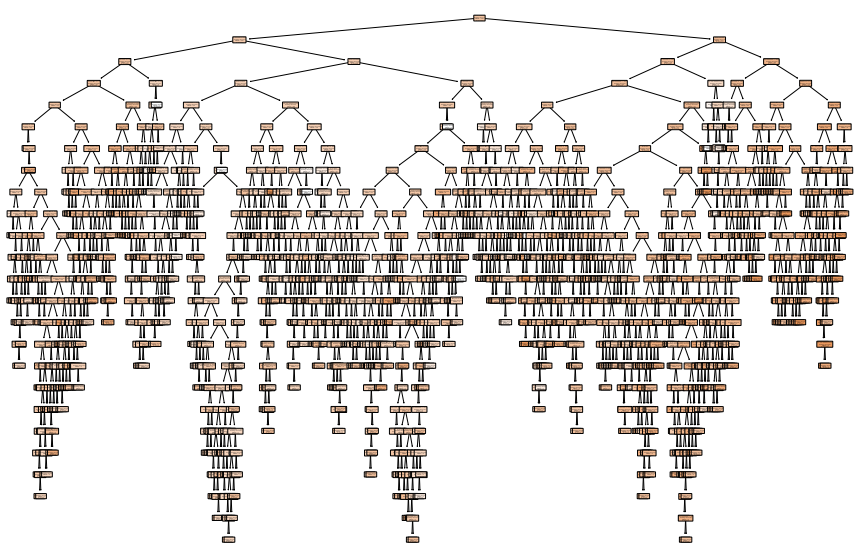

In [60]:
fig = plt.figure(figsize=(15, 10))
plot_tree(regr_best.estimators_[0], 
          feature_names=x_cols,
          class_names=range(3,10), 
          filled=True, impurity=True, 
          rounded=True)
plt.show()

In [61]:
fig_file = '../image/regr_tree.png'
if os.path.isfile(fig_file):
    os.remove(fig_file)
fig.savefig('../image/regr_tree.png')

In [62]:
cf = multilabel_confusion_matrix(y_test, y_pred)
print(cf)
l =['3', '4', '5', '6', '7', '8', '9']
mlstats(cf, l)

[[[1289    0]
  [  11    0]]

 [[1260    0]
  [  39    1]]

 [[ 752  134]
  [ 111  303]]

 [[ 478  243]
  [ 137  442]]

 [[1011   73]
  [ 115  101]]

 [[1264    0]
  [  33    3]]

 [[1296    0]
  [   4    0]]]
Label: 3, Precision: 1.0000, Recall: 0.9915, Specificity: 0.0000, Accuracy: 0.9915, F1: 0.9957 
Label: 4, Precision: 1.0000, Recall: 0.9700, Specificity: 1.0000, Accuracy: 0.9700, F1: 0.9848 
Label: 5, Precision: 0.8488, Recall: 0.8714, Specificity: 0.6934, Accuracy: 0.8115, F1: 0.8600 
Label: 6, Precision: 0.6630, Recall: 0.7772, Specificity: 0.6453, Accuracy: 0.7077, F1: 0.7156 
Label: 7, Precision: 0.9327, Recall: 0.8979, Specificity: 0.5805, Accuracy: 0.8554, F1: 0.9150 
Label: 8, Precision: 1.0000, Recall: 0.9746, Specificity: 1.0000, Accuracy: 0.9746, F1: 0.9871 
Label: 9, Precision: 1.0000, Recall: 0.9969, Specificity: 0.0000, Accuracy: 0.9969, F1: 0.9984 
